<a href="https://colab.research.google.com/github/hazelortegaaa/Summer/blob/main/Linear_Regression_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Analysis

Regression analysis refers to the use of statistical methods to estimate the relationships between one or more independent variables and dependent variables. 

Regression is a powerful tool as it is used to assess the strength of the relationship between two or more variables, and then it would be used for modeling the relationship between those variables in the future.

[source](https://en.wikipedia.org/wiki/Regression_analysis)


# Building a basic regression model.

###*We know that a Linear regression is a way to model the relationship between two variables. We will use the equation as the slope formula. The equation has the form:* 

<font size =  6><center>$Y = \alpha + \beta X$</center></font>

*where `Y` is the dependent variable (that’s the variable on the vertical or `Y` axis).*

*`X` is the independent variable (i.e. it is plotted on the Horizonr=tal or `X` axis).*

 *`b` is the slope of the line and `a` is the `y-intercept`.*


In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as smf

In [16]:
#To construct out analysis, first lets generate some random data
np.random.seed(10)
X = 2.5 * np.random.randn(1000) + 1.5 #Array  of 100 values with mean  =1.5, stddev =2.5
res = 0.5 * np.random.rand(1000) #Generate 100 residual terms
y = 2 + 0.3 * X + res #Actual values of X

In [29]:
#Now lets create a pandas dataframe to store our X and Y values

df = pd.DataFrame({'X' : X, 'y' : y})

In [30]:
df.head()

,X,y
0,4.828966,3.685550
1,3.288197,3.376161
2,-2.363501,1.715841
3,1.479040,2.672969
4,3.053340,3.244350


### We can now calculate $\beta$ and $\alpha$.

*This is the formula for each...*

<font size="6"><center>$\alpha = \frac{\sum(y)\sum(x^2) - \sum(x)\sum(xy)}{n\sum(x^2) - (\sum(x))^2}$</center>
<br>
<center>$\beta = \frac{n\sum(xy) - \sum(x)\sum(y)}{n\sum(x^2) - (\sum(x))^2}$</center></font>


### We can now calculate $\beta$ and $\alpha$.

*This is the formula for each...*

<font size="6"><center>$\alpha = \frac{\sum(y)\sum(x^2) - \sum(x)\sum(xy)}{n\sum(x^2) - (\sum(x))^2}$</center>
<br>
<center>$\beta = \frac{n\sum(xy) - \sum(x)\sum(y)}{n\sum(x^2) - (\sum(x))^2}$</center></font>


# Next, we want to calculate the mean of X and the mean y

####*The mean of an array refers to the sum of array elements divided by the number of elements.*


In [31]:
xmean = np.mean(X)
ymean = np.mean(y)

#Now, we need to calculate the terms needed for the numator and denominator of beta to satisfy the line equation formula.


In [36]:
df['xycov'] = (df['X']) -xmean * (df['y']) - ymean
df['xvar'] = (df['X'] -xmean)**2

In [35]:
df.head()

,X,y,xycov,xvar
0,4.828966,3.685550,-3.251989,11.325633
1,3.288197,3.376161,-4.339934,3.329125
2,-2.363501,1.715841,-7.561573,14.646764
3,1.479040,2.672969,-5.119894,0.000238
4,3.053340,3.244350,-4.381871,2.527246


In [37]:
beta = df['xycov'].sum() / df['xvar'].sum()
alpha = ymean - (beta * xmean)
print(f'alpha = {alpha}')
print(f'beta = {beta}')

alpha = 4.059053921870692
beta = -0.9376143688864084


In [27]:
ypred = alpha + (beta*X)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0, 0.5, 'y')

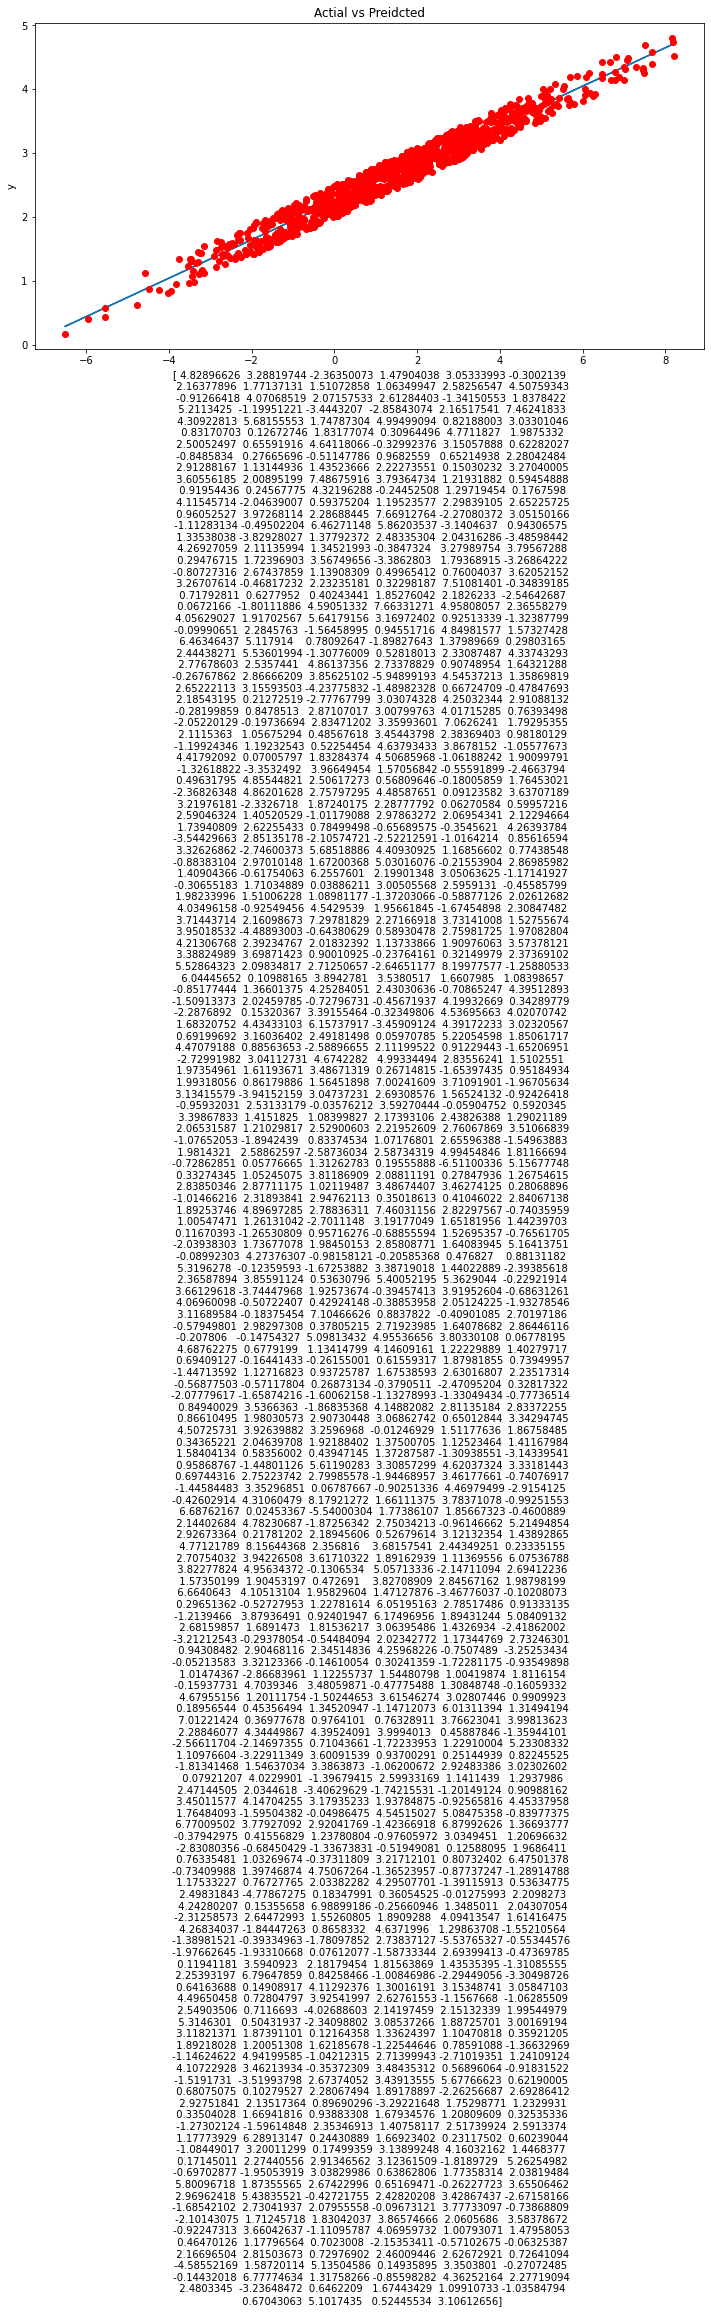

In [28]:
plt.figure (figsize = (12,6))
plt.plot(X, ypred)
plt.plot(X, y, 'ro')
plt.title('Actial vs Preidcted')
plt.xlabel(X)
plt.ylabel('y')